In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [3]:
pct_to_target = np.random.normal(avg,std_dev,num_reps).round(2)

In [4]:
pct_to_target[:10]

array([0.88, 1.02, 1.07, 0.83, 1.03, 1.04, 0.94, 1.  , 0.87, 1.07])

In [5]:
sales_target_values = [75_000,100_000,200_000,300_000,400_000,500_000]
sales_target_prob = [.3,.3,.2,.1,.05,.05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [7]:
df = pd.DataFrame(index=range(num_reps),data={"Pct_to_target": pct_to_target, "Sales_target": sales_target})
df["Sales"] = df["Pct_to_target"]*df["Sales_target"]

In [8]:
df.head()

,Pct_to_target,Sales_target,Sales
0,0.88,75000,66000.0
1,1.02,100000,102000.0
2,1.07,75000,80250.0
3,0.83,200000,166000.0
4,1.03,300000,309000.0


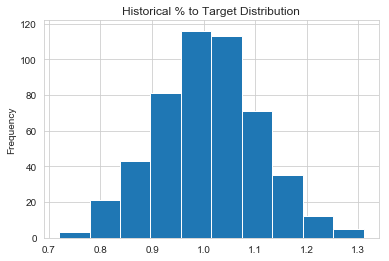

In [11]:
df["Pct_to_target"].plot(kind="hist", title="Historical % to Target Distribution")

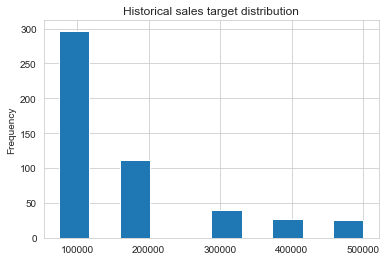

In [12]:
df["Sales_target"].plot(kind="hist", title="Historical sales target distribution")

In [9]:
def calc_comission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x<=.9:
        return .02
    if x<=.99:
        return .03
    else:
        return .04

In [13]:
df["Commission_rate"] = df["Pct_to_target"].apply(calc_comission_rate)
df["Commission_Amount"] = df["Sales"]*df["Commission_rate"]

In [14]:
df.head()

,Pct_to_target,Sales_target,Sales,Commission_rate,Commission_Amount
0,0.88,75000,66000.0,0.02,1320.0
1,1.02,100000,102000.0,0.04,4080.0
2,1.07,75000,80250.0,0.04,3210.0
3,0.83,200000,166000.0,0.02,3320.0
4,1.03,300000,309000.0,0.04,12360.0


In [16]:
print(df["Sales"].sum())

84002000.0


In [18]:
#Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

In [19]:
# Loop through many simulations
for i in range(num_simulations):
    
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg,std_dev,num_reps).round(2)
    
     # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps),data={"Pct_to_target": pct_to_target, "Sales_target": sales_target})
    
    # Back into the sales number using the percent to target rate
    df["Sales"] = df["Pct_to_target"]*df["Sales_target"]
    
     # Determine the commissions rate and calculate it
    df["Commission_rate"] = df["Pct_to_target"].apply(calc_comission_rate)
    df["Commission_Amount"] = df["Sales"]*df["Commission_rate"]
    
     # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df["Sales"].sum().round(0),
                     df["Commission_Amount"].sum().round(0),
                     df["Sales_target"].sum().round(0)])
    

In [20]:
results_df = pd.DataFrame.from_records(all_stats, columns=["Sales", "Commission_Amount", "Sales_Target"])

In [21]:
results_df.describe().style.format("{:,}")

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,808,821.75","2,860,475.784","83,813,300.0"
std,"2,773,179.4271060615","105,296.01753075562","2,728,095.373033055"
min,"73,762,250.0","2,492,065.0","74,175,000.0"
25%,"81,985,750.0","2,789,891.5","81,993,750.0"
50%,"83,637,875.0","2,859,416.5","83,700,000.0"
75%,"85,636,312.5","2,927,059.75","85,675,000.0"
max,"91,958,500.0","3,182,678.0","92,100,000.0"
